In [173]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from scipy.interpolate import interp1d

%matplotlib inline

beta = .09
r = .02
w = 1
p = 2
beta = 0.95
z_high = 1.5
z_low = .5

Pr_LL = .5
Pr_LH = .5
Pr_HL = .5
Pr_HH = .5
N = 500
maxiter = 1000
xmax = 10


In [174]:
xvals = np.linspace(.01, xmax, N)
yvals_L = np.zeros(N) # start with the zero function
yvals_H = np.zeros(N) # start with the zero function
yvals = np.array([yvals_L,yvals_H]) # value function
asset = np.array([np.zeros(N), np.zeros(N)])
cons = np.array([np.zeros(N), np.zeros(N)])

yvals.shape


(2, 500)

In [175]:
tol = 1E-5
dist = 1 # 1 is just a large value to initialize dist

def u(c):
    return (c**(1-p)-1)/(1-p)
def g(x, a_next, V_L, V_H, z):
   
    if x-a_next>= 0:
        if z == z_low:
            #print(f"output {u(x-a_next) + beta*(Pr_LL*V_L + Pr_LH*V_H)}")
            return u(x-a_next) + beta*(Pr_LL*V_L + Pr_LH*V_H)
        
        if z == z_high:
            return u(x-a_next) + beta*(Pr_HL*V_L + Pr_HH*V_H)
            # return u(x-a_next) + beta*((Pr_HL*V((1+r)*a_next + w*z_low) + Pr_HH*V((1+r)*a_next + w*z_low)))
    else:
        print("ninf")
        return np.NINF # return negative infinity if consumption is negative
def sup(arr): # sup norm (max of absolute value)
    return la.norm(arr, np.inf)



In [185]:
tol = .0000001
dist = 1
counter = 0
while dist > tol and counter < maxiter:

    
    new_yvals = np.copy(yvals)
    #V = np.interp(xvals, xvals, yvals)
    #print(f"yvals {yvals}")
    
    # for each x
    for i in range(1,N): # starting from zero causes issues
    # compute new value function
        # evaluate g() at all values of a_next
        evals_L = np.array([g(xvals[i], xvals[j], yvals[0][j], yvals[1][j], z_low) for j in range(i)])
        evals_H = np.array([g(xvals[i], xvals[j], yvals[0][j], yvals[1][j], z_high) for j in range(i)])   
        new_yvals[:,i] = [max(evals_L), max(evals_H)] # take maximum value of g
        
        # compute new assets/consumption
        asset[:,i] = [xvals[np.argmax(evals_L)], xvals[np.argmax(evals_H)]]
        cons[:,i] = np.array([xvals[i],xvals[i]]) - asset[:,i]
        
    counter +=1
    
    dist = max(sup(new_yvals[0] - yvals[0]), sup(new_yvals[1] - yvals[1]))
    
    yvals = new_yvals
    
    

In [177]:
# get actual evaluable functions
asset_func_low = interp1d(xvals, asset[0])
asset_func_high = interp1d(xvals, asset[1])
def asset_func(x, z):
    if z == z_low:
        return asset_func_low(x)
    if z == z_high:
        return asset_func_high(x)
    
cons_func_low = interp1d(xvals, cons[0])
cons_func_high = interp1d(xvals, cons[1])
def cons_func(x, z):
    if z == z_low:
        return cons_func_low(x)
    if z == z_high:
        return cons_func_high(x)

asset_func_low(5)

array(2.47246493)

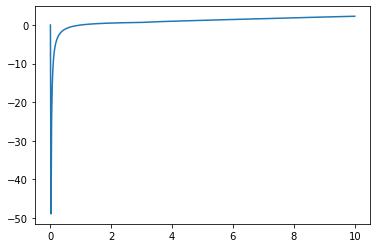

In [178]:
plt.figure(2)
plt.plot(xvals,yvals[1])


In [179]:
# Check that the additional restriction does not bind
bind = False
for i in range(N):
    for j in range(1):
        if (1+r)*asset[j,i] + w*1.5 >= xmax:
            bind = True
if bind == True:
    print("additional restriction DOES bind")
    
if bind == False:
    print("additional restriction does NOT bind")
        



additional restriction does NOT bind


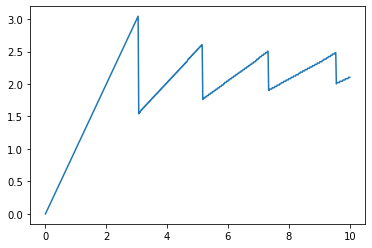

In [180]:
plt.plot(xvals, cons[0]) # plot low consumption function

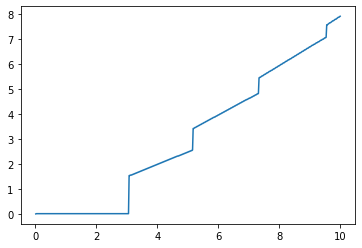

In [181]:
plt.plot(xvals, asset[0]) # plot low asset function

In [182]:
def shock(z, Pr_LL, Pr_LH, Pr_HL, Pr_HH):
    if z == z_low:
        if np.random.rand() < Pr_LL:
            z_next = z_low
        else:
            z_next = z_high
    if z == z_high:
        if np.random.rand() < Pr_HL:
            z_next = z_low
        else:
            z_next = z_high
    return z_next
    

0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


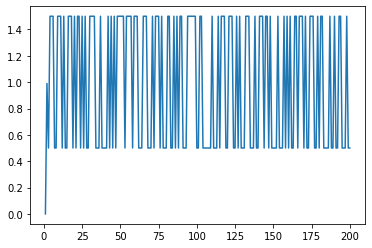

In [183]:
# initialization
asset_path = np.zeros(200); cons_path = np.zeros(200)
shock_path = np.zeros(200); x_path = np.zeros(200); wage_path = np.zeros(200)
# initial conditions
asset_path[0] = a_0; x_path[0] = w; shock_path[0] = z_low; wage_path[0] = w 

for i in range(1, 200): # double check for OBOE
    cons_path[i] = cons_func(x_path[i-1], shock_path[i-1])
    asset_path[i] = asset_func(x_path[i-1], shock_path[i-1])
    shock_path[i] = shock(shock_path[i-1], Pr_LL, Pr_LH, Pr_HL, Pr_HH)
    wage_path[i] = w*shock_path[i]
    x_path[i] = (1+r)*asset_path[i] + wage_path[i]
plt.plot(np.linspace(1,200, 200), cons_path) # plot consumption




    

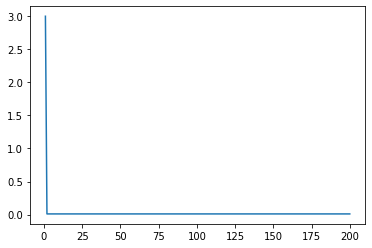

In [184]:
plt.plot(np.linspace(1,200, 200), asset_path) # plot assets